In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
path_to_csv = './data_noNoise/oneset_cmd_time_height.csv'

In [4]:
data_list = []
with open(path_to_csv) as datafile:
    data = csv.reader(datafile,delimiter=' ', quotechar='|')
    for row in data:
        data_list.append(row)

In [5]:
csv_array = np.array([[float(d) for d in x[0].split(',')] for x in data_list])

In [7]:
def func(cmd):
    #return lambda t, alpha_1, alpha_2, p, c: alpha_1 + alpha_2*np.exp(-p*t) + c*cmd*t
    return lambda t, alpha_2, p, c: alpha_2*np.exp(-p*t) + c*cmd*t

In [10]:
def to_dict(array = csv_array):
    cmds = set(list(array[:,0]))
    time_height_dict = {}
    for c in cmds:
        time_height_dict[c] = []
    for row in array:
        time_height_dict[row[0]].append(row[1:])
    return time_height_dict

In [11]:
t_h_dict = to_dict()

In [13]:
for k in t_h_dict:
    t_h_dict[k] = np.array(t_h_dict[k])

In [37]:
def normalize_times(arr):
    '''arr is laid out:
    t0 | h0
    t1 | h1
    ...'''
    times = arr[:,0]
    normalized_times = np.array([t-times[0] for t in times])
    print(normalized_times.shape)
    return np.array([normalized_times.T,arr[:,1]]).T

In [38]:
dict_norm_times = {}
for k in t_h_dict:
    dict_norm_times[k] = normalize_times(t_h_dict[k])

(84,)
(39,)
(31,)
(61,)
(45,)
(29,)
(24,)
(23,)
(21,)
(19,)
(17,)
(17,)
(15,)
(13,)
(15,)
(13,)


In [43]:
def calc_coeff(cmd, arr, f = func):
    return curve_fit(f(cmd),arr[:,0],arr[:,1])

def process_dict(input_dict = dict_norm_times, f=func):
    curve_coeffs = []
    dict_version = {}
    for k in input_dict:
        arr = input_dict[k]
        coeffs_etc = calc_coeff(k, arr, f)
        curve_coeffs.append(coeffs_etc[0])
        dict_version[k] = coeffs_etc[0]
    return curve_coeffs, dict_version

In [44]:
arr, dict_v = process_dict()

//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()
//anaconda/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in multiply
  app.launch_new_instance()


In [45]:
dict_v

{1.25: array([ 17.83423285,   0.06029175,   1.143718  ]),
 1.5: array([ 18.14215466,   0.07128344,   1.24329301]),
 1.75: array([ 18.26152229,   0.11458641,   1.53627418]),
 2.0: array([ 18.04430773,   0.11999576,   1.50496144]),
 2.25: array([ 18.38572033,   0.16624665,   1.73480154]),
 2.5: array([ 17.89817163,   0.15337795,   1.56501303]),
 2.75: array([ 18.13222943,  -0.14850974,  -0.48441874]),
 3.0: array([ 17.83228641,  -0.14371535,  -0.29461124]),
 3.25: array([ 17.84675015,  -0.17314206,  -0.42111837]),
 3.5: array([ 18.10788431,  -0.17837035,  -0.35812079]),
 3.75: array([ 17.80730558,  -0.19964841,  -0.36009383]),
 4.0: array([ 17.81802981,  -0.2092455 ,  -0.37986551]),
 4.25: array([ 17.93192721,  -0.25989881,  -0.57575183]),
 4.5: array([ 17.97036702,  -0.24110016,  -0.40156935]),
 4.75: array([ 17.79225529,  -0.27580522,  -0.47683829]),
 5.0: array([ 17.70858719,  -0.24258537,  -0.20703424])}

In [46]:
def plotter(cmd):
    arr = dict_norm_times[cmd]
    plt.scatter(arr[:,0], arr[:,1])
    t = np.arange(0., arr[-1,0], 0.2)
    alpha_2, p, c = dict_v[cmd]
    plt.plot(t,func(cmd)(t, alpha_2, p, c))
    plt.show()

In [53]:
def mix_match_plotter(cmd1,cmd2):
    arr = dict_norm_times[cmd1]
    plt.scatter(arr[:,0], arr[:,1])
    t = np.arange(0., arr[-1,0], 0.2)
    alpha_2, p, c = dict_v[cmd2]
    plt.plot(t,func(cmd2)(t, alpha_2, p, c))
    plt.show()

In [73]:
def plot_against_params(cmd,params):
    arr = dict_norm_times[cmd]
    plt.scatter(arr[:,0], arr[:,1])
    t = np.arange(0., arr[-1,0], 0.2)
    a, p, c = params
    plt.plot(t,func(cmd)(t,  a, p, c))
    plt.show()

In [74]:
pos_mean = np.mean(arr[:6],0)

In [78]:
pos_mean

array([ 18.09435158,   0.11429699,   1.45467687])

In [75]:
neg_mean = np.mean(arr[6:],0)

In [79]:
neg_mean

array([ 17.89476224,  -0.2072021 ,  -0.39594222])

1.25


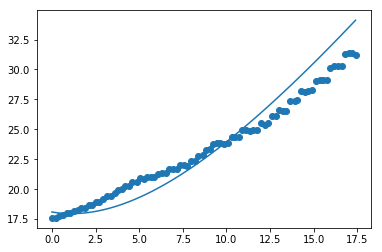

2.0


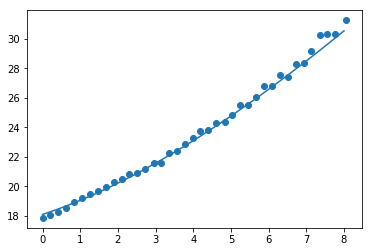

2.25


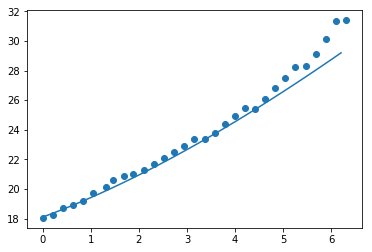

1.5


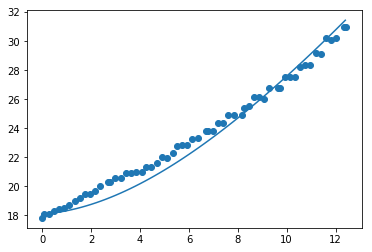

1.75


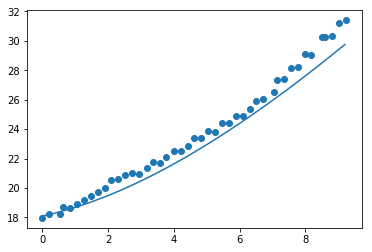

2.5


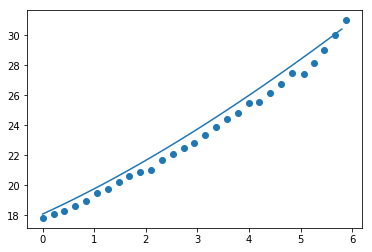

2.75


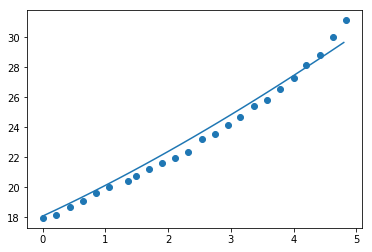

3.0


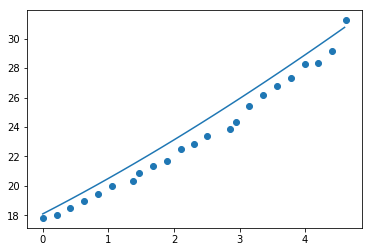

3.25


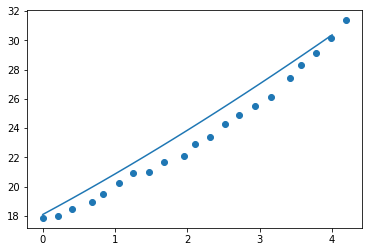

3.5


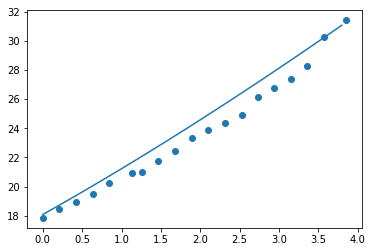

3.75


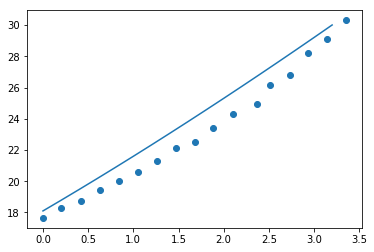

4.0


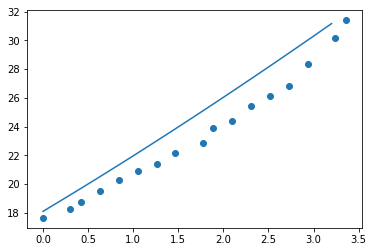

4.25


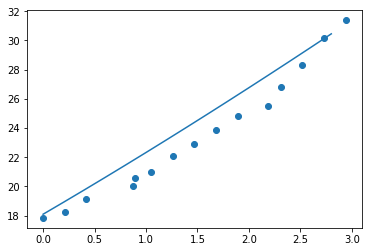

5.0


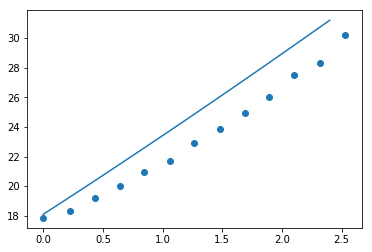

4.5


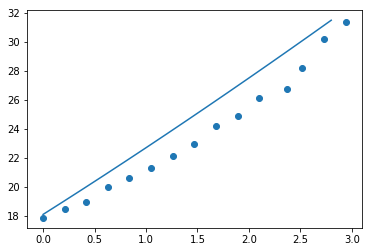

4.75


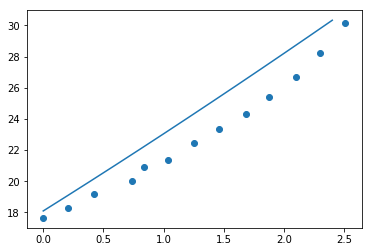

In [76]:
for k in dict_v:
    print(k)
    plot_against_params(k, pos_mean)

1.25


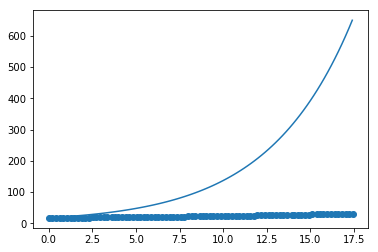

2.0


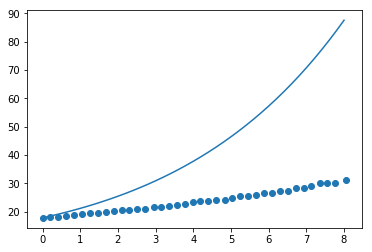

2.25


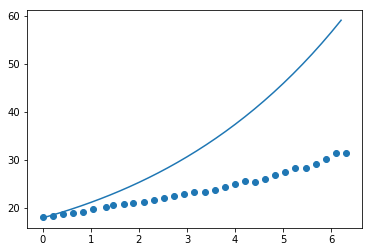

1.5


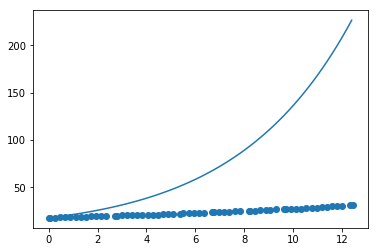

1.75


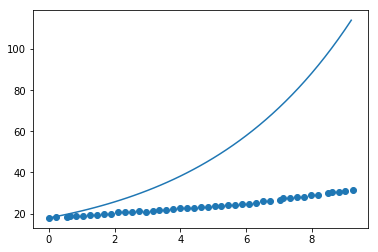

2.5


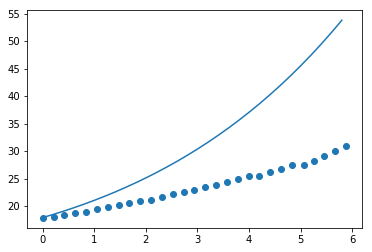

2.75


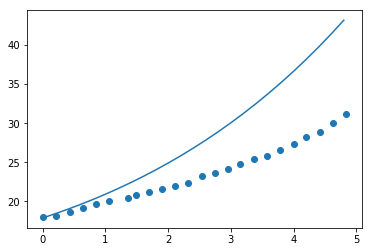

3.0


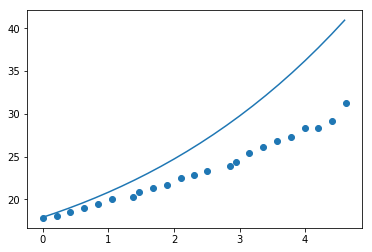

3.25


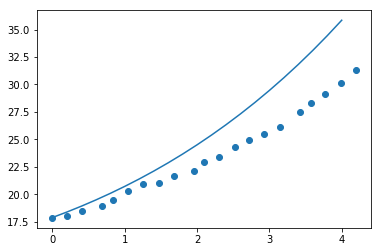

3.5


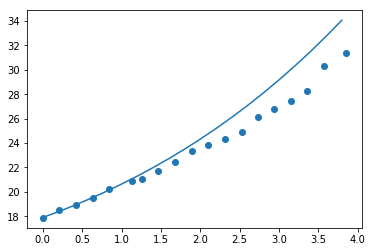

3.75


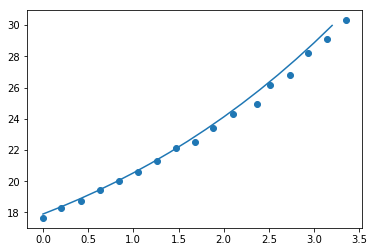

4.0


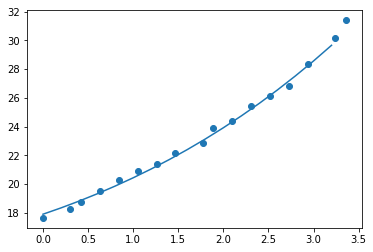

4.25


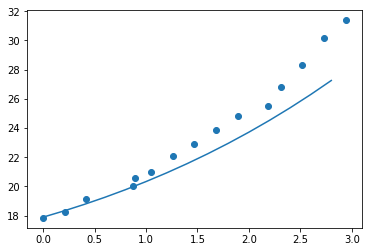

5.0


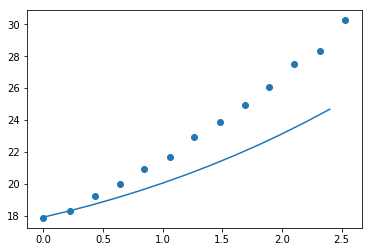

4.5


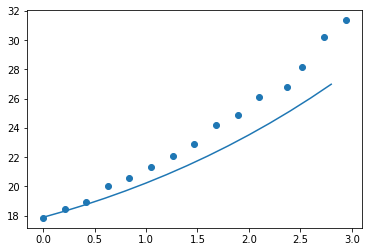

4.75


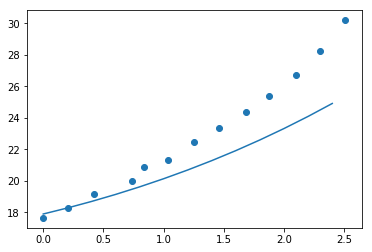

In [77]:
for k in dict_v:
    print(k)
    plot_against_params(k, neg_mean)

# ARCHIVED

1.25


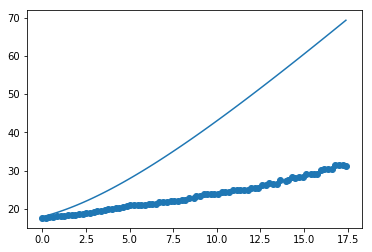

2.0


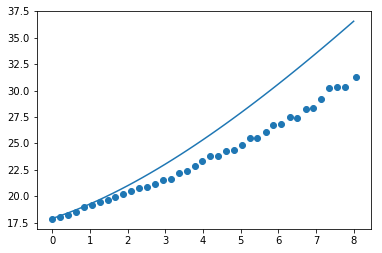

2.25


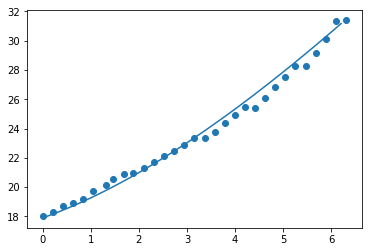

1.5


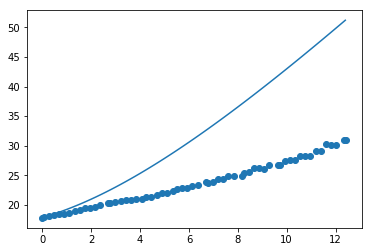

1.75


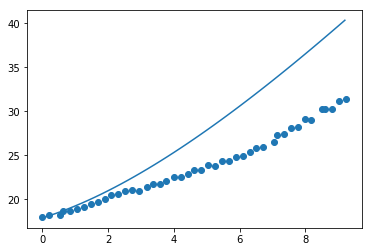

2.5


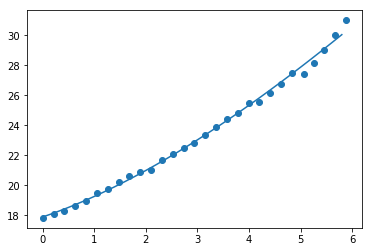

2.75


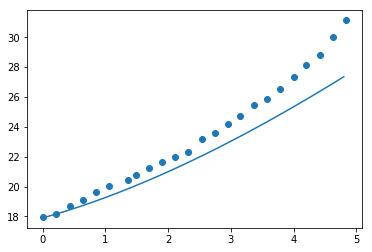

3.0


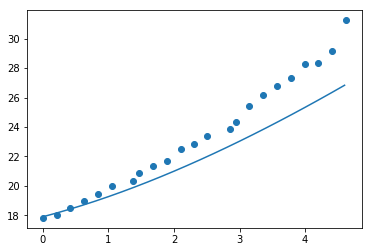

3.25


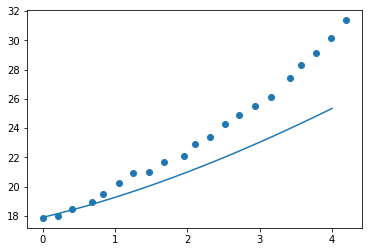

3.5


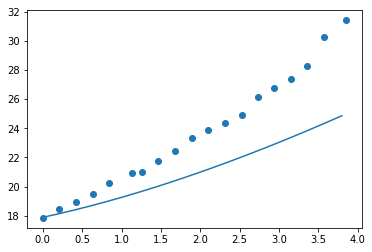

3.75


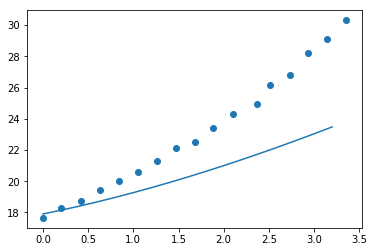

4.0


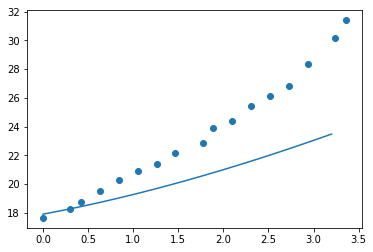

4.25


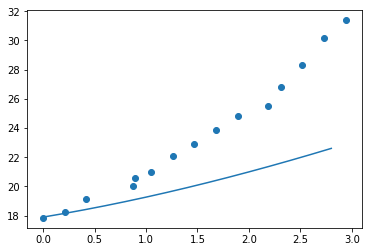

5.0


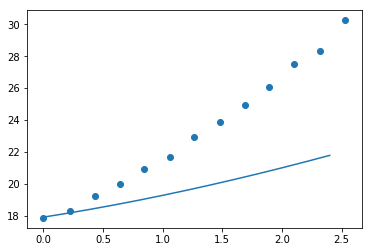

4.5


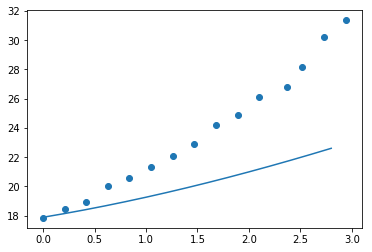

4.75


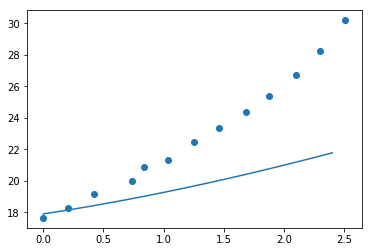

In [60]:
for k in dict_v:
    print(k)
    mix_match_plotter(k,2.5)

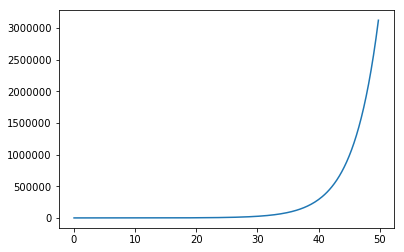

In [52]:
t = np.arange(0., 50, 0.2)
alpha_2, p, c = dict_v[5]
plt.plot(t,func(5)(t, alpha_2, p, c))
plt.show()